##### To use a Support Vector Machine (SVM) for anomaly detection, start by loading and cleaning the dataset to ensure data quality. Next, select key features that are indicative of anomalies and split the dataset into training and testing portions. Applying feature scaling to normalize data dimensions is crucial for SVM performance. Train the SVM model with appropriate kernel functions and parameters. Finally, the model will be evaluated using precision, recall, and the F1-score, and its performance will be visualized with a confusion matrix. This structured approach ensures the SVM model effectively identifies anomalies, balancing detection accuracy and model reliability.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import OneClassSVM

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 350735 to 352413
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Global_active_power    50000 non-null  object 
 1   Global_reactive_power  50000 non-null  object 
 2   Voltage                50000 non-null  object 
 3   Global_intensity       50000 non-null  object 
 4   Sub_metering_1         50000 non-null  object 
 5   Sub_metering_2         50000 non-null  object 
 6   Sub_metering_3         49797 non-null  float64
dtypes: float64(1), object(6)
memory usage: 3.1+ MB


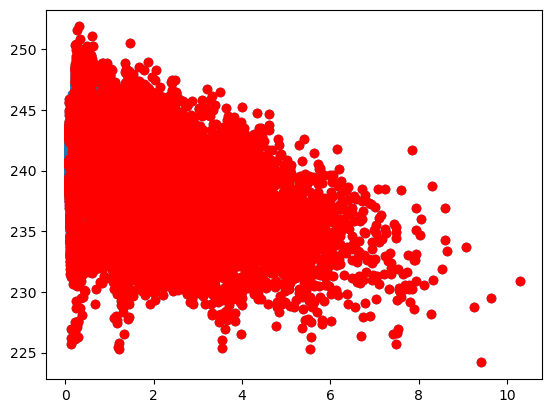

Precision: 0.913
Recall: 0.754
F1 Score: 0.804
              precision    recall  f1-score   support

           0       0.25      0.84      0.38       903
           1       0.98      0.75      0.85      9057

    accuracy                           0.75      9960
   macro avg       0.61      0.79      0.61      9960
weighted avg       0.91      0.75      0.80      9960



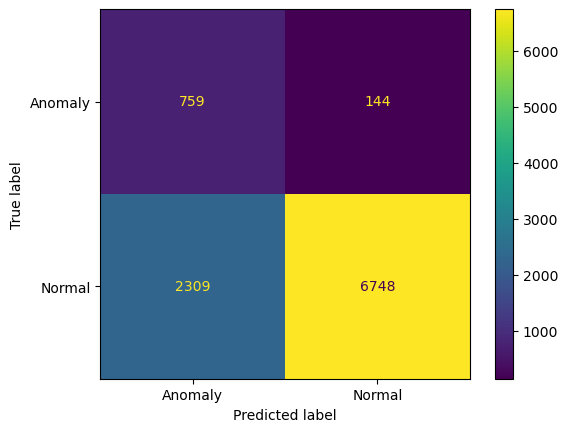

In [9]:

def anomaly_detection_svm():
    # Load the dataset
    
    data1 = pd.read_csv('pow_cons.csv')
    
    
    data = data1.sample(n=50000, random_state=5)
    
    data = data.drop(['Date','Time'], axis=1)
    data.info()
    
    data.dropna(axis=0, inplace=True)
    
#     X = data.drop('Global_active_power', axis=1)  # Assuming 'target' is the column name of the continuous target variable
#     y_cont = data['Global_active_power']
    
    #convert all the values in the columns into numeric
    for column in data.columns:
        data[column] = pd.to_numeric(data[column], errors='coerce')


    model = OneClassSVM(kernel='rbf', gamma='auto', nu = 0.2).fit(data)
    y_pred = model.predict(data)

    anomaly_values = data.iloc[np.where(y_pred ==-1)]


    plt.scatter(data["Global_active_power"], data["Voltage"])
    plt.scatter(anomaly_values["Global_active_power"],anomaly_values["Voltage"], c="r")
    plt.show()
    
#     sns.pairplot(data, kind='scatter')
#     plt.title('Scatter Plot')
#     plt.show()
    
    X = data.drop('Global_active_power', axis=1)  # Assuming 'label' is your target column
    y_cont = data['Global_active_power']

#     # First, binarize `y` based on a chosen threshold.
    y = np.where(y_cont > 0.2, 1, 0)  # Define `threshold` based on your domain knowledge

    # Select top k features; k might be adjusted based on the dataset
    selector = SelectKBest(f_classif, k=3)
    X_selected = selector.fit_transform(X, y)
    
    
    
    # Split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
    
    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
#     # Use SVM and fit the model
#     svm = SVC(kernel='rbf', gamma='scale', degree=5, coef0=0.0)
#     svm.fit(X_train_scaled, y_train)
    
     # Predict on the test set
#     y_pred = svm.predict(X_test_scaled)
    
     # Initialize One-Class SVM
    # Note: nu should be an estimate of the proportion of outliers
    oc_svm = OneClassSVM(kernel='rbf', gamma='auto', nu=0.05)
    # Fit the model on the training data
    # Note: One-Class SVM is typically trained only on the normal data (label 0)
    oc_svm.fit(X_train_scaled[y_train == 0])
    
   
    
    # Predict on the test data
    y_pred = oc_svm.predict(X_test_scaled)
    # Convert predictions to match the original label (1 for normal, -1 for anomaly)
    y_pred = np.where(y_pred == 1, 0, 1)
    
    # Evaluate the final outcome
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Print evaluation metrics
    print(f'Precision: {precision:.3f}')
    print(f'Recall: {recall:.3f}')
    print(f'F1 Score: {f1:.3f}')
    
    print(classification_report(y_test, y_pred))
    
    
    # Use a confusion matrix for visualization of the outcome
    cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Anomaly', 'Normal'])
    disp.plot()
    plt.show()

# Example usage

anomaly_detection_svm()